# 10.1 임베딩

사람이 사용하는 언어(자연어)를 컴퓨터가 이해하 수 있는 언어(숫자) 형태인 벡터로 변환한 결과 혹은 일련의 과정을 의미

임베딩 역할
- 단어 및 문장 간 관련성 계산
- 의미적 혹은 문법적 정보의 함축

### 10.1.1 희소 표현 기반 임베딩
희소 표현(sparse representation)은 대부분의 값이 0으로 채워져 있는 경우 (ex. 원-핫인코딩)

**원-핫 인코딩**
주어진 텍스트를 숫자(벡터)로 변환해 주는 것, 단어 N개를 각각 N차원의 벡터로 표현하는 방식
- 단어가 포함되어 있는 위치에 1을 넣고, 나머지에는 0 값을 채움
- 단점: 수학적인 의미에서 원-핫 벡터들은 하나의 요소만 1 값을 갖고 나머지는 모두 0인 희소 벡터를 가짐, 차원의 저주(하나의 단어를 표현하는 데 말뭉치에 있는 수만큼 차원이 존재해 복잡해짐)

In [ ]:
# 원-핫 인코딩 적용
import pandas as pd
class2 = pd.read_csv("..\chap10\data\class2.csv")

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

### 10.1.2 횟수 기반 임베딩

- ex. 카운터 벡터, TF-IDF

**카운터 벡터**
- 문서 집합에서 단어를 토큰으로 생성하고 각 단어의 출현 빈도수를 이용해 인코딩해서 벡터를 만드는 방법
- 토크나이징과 벡터화가 동시에 가능한 방법
- 사이킷런의 CountVectorizer()를 사용해 코드를 구현
- 1. 문서를 토큰 리스트로 변환함.
- 2. 각 문서에서 토큰의 출현 빈도를 셈.
- 3. 각 문서를 인코딩하고 벡터로 변환함.

In [ ]:
# 코퍼스에 카운터 벡터 적용
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance',
    'you will never get any chance',
    'will you do get this one?',
    'please, get this chance',
]

vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [ ]:
# 배열 변환
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [ ]:
# 불용어를 제거한 카운터 벡터
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

**TF-IDF**
- 정보 검색론에서 가중치를 구할 때 사용되는 알고리즘.
- TF(단어 빈도)는 문서 내에서 특정 단어가 출현한 빈도를 의미
- IDF(역문서 빈도) 중 DF(문서 빈도)란 한 단어가 전체 문서에서 얼마나 공통적으로 많이 등장하는지 나타내는 값. 즉, 특정 단어가 나타난 문서 개수
- 특정 단어가 모든 문서에 등장하는 일반적인 단어(a, the...) 라면, TF-IDF 가중치를 낮추어 줄 필요가 있음. -> DF 값이 클수록 TF-IDF 가중치 값을 낮추기 위해 DF 값에 역수를 취하는데, 이 값이 IDF임.

- TF-IDF 사용 상황
  - 키워드 검색을 기반으로 하는 검색 엔진
  - 중요 키워드 분석
  - 검색 엔진에서 검색 결과의 순위를 결정

In [ ]:
# TF-IDF를 적용한 후 행렬로 표현
from sklearn.feature_extraction.text import TfidVectorizer
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_
      shape()[1]), '행렬을 만들었습니다.')
print(doc_distance.toarray())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-437814763.py, line 7)

### 10.1.3 예측 기반 임베딩
- 신경망 구조 혹은 모델을 이용해 특정 문맥에서 어떤 단어가 나올지 예측하면서 단어를 벡터로 만드는 방식
- ex. 워드투벡터

**워드투벡터(Word2Vec)**
- 신경망 알고리즘으로, 주어진 텍스트에서 텍스트의 각 단어마다 하나씩 일련의 벡터를 출력
- 출력 벡터가 2차원 그래프에 표시될 때, 의미론적으로 유사한 단어의 벡터는 서로 가깝게 표현됨.
- 특정 단어의 동의어를 찾을 수 있음.

- 수행 과정
  - 일정한 크기의 윈도우(window)로 분할된 텍스트를 신경망 입력으로 사용함.
  - 이때 모두 분할된 텍스트는 한 쌍의 대상 단어와 컨텍스트로 네트워크에 공급됨.
  - 또한, 네트워크의 은닉층에는 각 단어에 대한 가중치가 포함되어 있음.

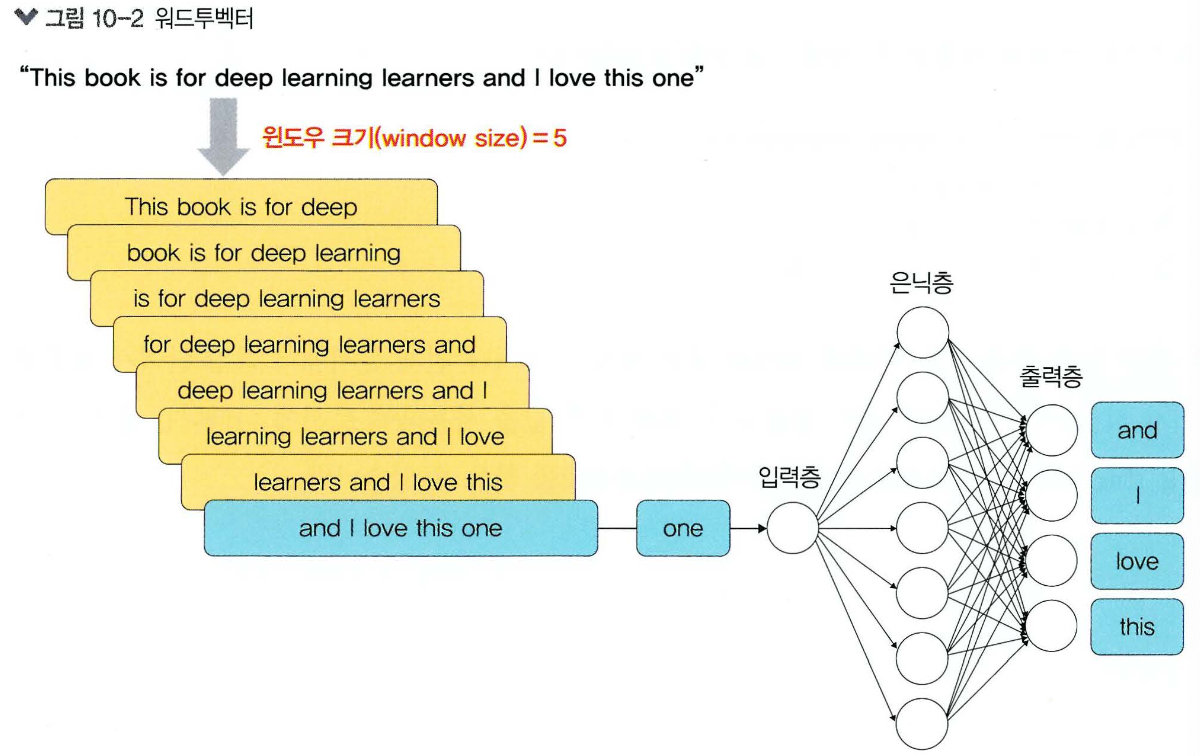

In [ ]:
# 데이터셋을 메모리로 로딩하고 토큰화 적용
from nltk.tokenize import sent_tokenize, workd_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec

sample = open('..\chap10\data\peter.txt', "r", encoding='UTF8')
s = sample.read()

f = s.replace("\n", " ")
data = []

for i in sent_tokenize(f):
  temp = []
  for j in word_tokenize(i):
    temp.append(j.lower())
  data.append(temp)

data

**CBOW(Continuous Bag Of Words)**

- 단어를 여러 개 나열한 후 이와 관련된 단어를 추정하는 방식
- 즉, 문장에서 등장하는 n개의 단어 열에서 다음에 등장할 단어를 예측

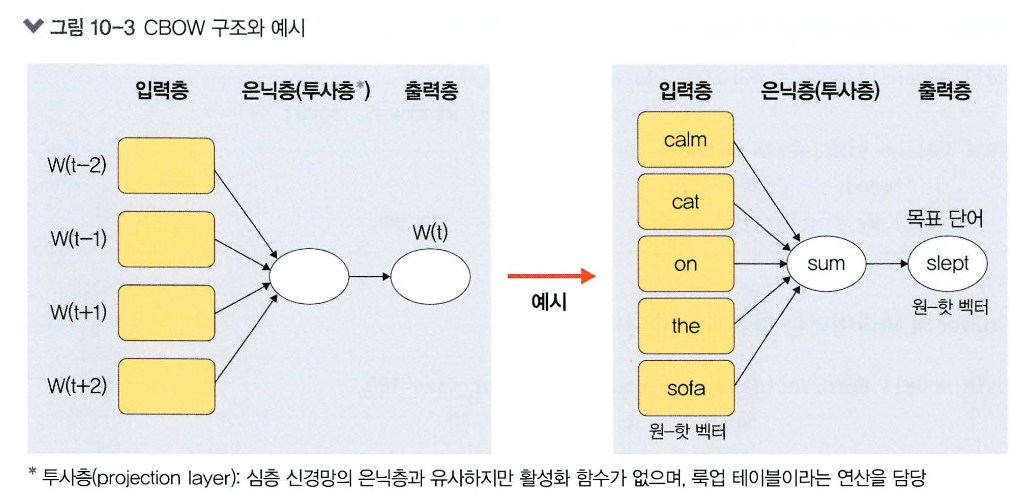

CBOW 신경망에서 크기가 N인 은닉층을 가지고 있을 때, 은닉층 크기 N은 입력 텍스트를 임베딩한 벡터 크기임.

**skip-gram**
- CBOW 방식과 반대로 특정한 단어에서 문맥이 될 수 있는 단어를 예측함
- 즉, skip-gram은 중심 단어에서 주변 단어를 예측하는 방식을 사용함.

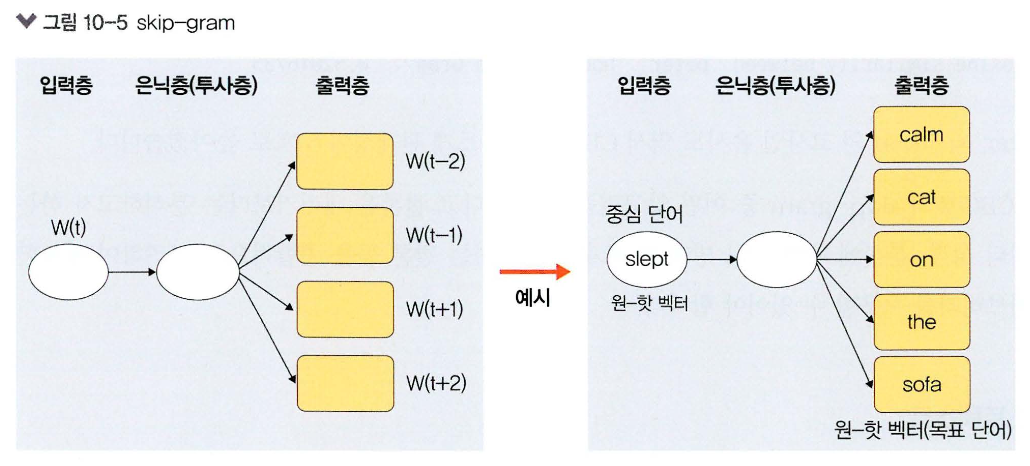

**패트스텍스트**

- 워드투벡터의 단점을 보완하고자 페이스북에서 개발한 임베딩 알고리즘
- 기존 워드투벡터의 워드 임베딩 방식은 분산 표현을 이용하여 단어의 분산 분포가 유사한 단어들에 비슷한 벡터 값을 할당해 표현함.
- 워드투벡터는 사전에 없는 단어에 대해서는 벡터 값을 얻을 수 없음.
- 워드투벡터는 자주 사용되지 않는 단어에 대해서는 학습이 불안정함.

- 패스트 텍스트는 이러한 단점을 보완하려고 개발된 단어 표현 방법을 사용함.
- 패스트 텍스트는 노이즈에 강하며, 새로운 단어에 대해서는 형태적 유사성을 고려한 벡터값을 얻기 때문에 자연어 처리 분야에서 많이 사용되는 알고리즘임.
- 패스트텍스트가 워드투벡터 단점을 극복하는 방법
  1. 사전에 없는 단어에 벡터 값을 부여하는 방법
  2. 자주 사용되지 않는 단어에 학습 안정성을 확보하는 방법

### 10.1.4 횟수/예측 기반 임베딩

**글로브(Glove, Global Vectors for Word Representation**
- 횟수 기반의 LSA(Latent Semantic Anaylsis, 잠재 의미 분석)와 예측 기반의 워드투벡터 단점을 보완하기 위한 모델임
- 단어에 대한 글로벌 동시 발생 확률 정보를 포함하는 단어 임베딩 방법임.
- 단어에 대한 통계 정보와 skip-gram을 합친 방식이라고 할 수 있음.
- skip-gram 방법을 사용하되 통계적 기법이 추가된 것.
- 단어 간 관련성을 통계적 방법으로 표현해줌.

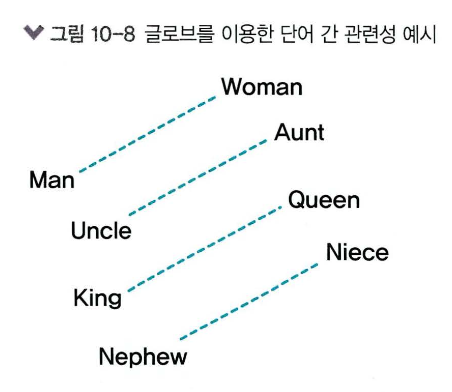